# 02 - Forecasting Weekly Shipment Volumes

This notebook forecasts weekly shipment volume for capacity planning using the cleaned FedEx dataset.

In [4]:
import sys
print(sys.executable)


/Users/priyankagupta/Fedex project/.venv/bin/python


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set style
sns.set(style='whitegrid')

## Load Data

In [8]:
import os

# Confirm where Python thinks the file is
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(base_dir, 'data', 'processed', 'fedex_cleaned.csv')

print("Searching for file at:\n", data_path)
print("Exists?", os.path.exists(data_path))


Searching for file at:
 /Users/priyankagupta/data/processed/fedex_cleaned.csv
Exists? False


## Weekly Aggregation

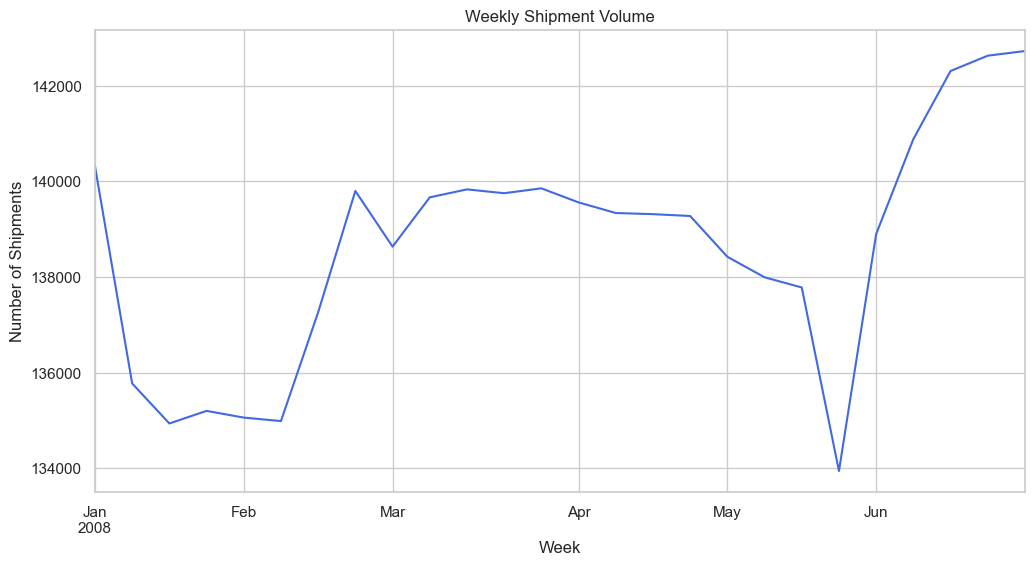

In [ ]:
weekly_volume = df.resample('W-Mon', on='Pickup_Date').size()
weekly_volume.plot(title='Weekly Shipment Volume', figsize=(12, 6), color='royalblue')
plt.ylabel('Number of Shipments')
plt.xlabel('Week')
plt.show()

## Fit SARIMA Model

In [ ]:
model = SARIMAX(weekly_volume, order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit(disp=False)

## Forecast Next 12 Weeks

In [ ]:
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# Plot Forecast
plt.figure(figsize=(12,6))
weekly_volume.plot(label='Observed', color='blue')
forecast_df['mean'].plot(label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='orange', alpha=0.3)
plt.title('12-Week Shipment Volume Forecast')
plt.legend()
plt.show()

## Save Forecast to CSV

In [ ]:
forecast_df.to_csv('../data/processed/weekly_forecast.csv')
forecast_df.head()